# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-11-18 19:18:36--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2021-11-18 19:18:36 (5.03 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
# According to the info above, there're no gaps in data. Let's see how many unique values each column has
print(X_train_pd.nunique())

0     549
1      41
2      27
3      61
4     126
5      31
6      16
7     119
8      34
9      13
10     65
11    116
12    334
13    131
14     35
15     23
16     40
17     30
18     31
dtype: int64


**Numbers in the first column are all different (maybe these are indexes). So let's delete it.**

In [6]:
X_test_pd = pd.DataFrame(X_test)

X_train_pd.drop(labels=[0], axis=1, inplace=True)
X_test_pd.drop(labels=[0], axis=1, inplace=True)

In [7]:
X_train_pd = X_train_pd.drop_duplicates()
X_train_pd

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,97,59,108,227,70,11,224,30,25,186,225,732,218,70,10,25,186,198
545,99,46,105,209,64,11,197,34,23,152,212,575,159,65,0,33,194,205
546,82,45,68,150,69,5,148,45,19,144,169,322,184,80,5,0,181,184
547,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203


**Dataset contains no duplicates.**

In [8]:
#normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train_pd)
X_train_scaled = scaler.transform(X_train_pd)
X_test_scaled = scaler.transform(X_test_pd)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
lr.fit(X_train_scaled, y_train)

LogisticRegressionCV(max_iter=500, multi_class='multinomial', solver='saga',
                     tol=0.001)

In [ ]:
predictions = lr.predict(X_test_scaled)
print("accuracy {}".format(accuracy_score(y_test, predictions)))
print("f1 {}".format(f1_score(y_test, predictions, average='weighted')))

accuracy 0.8282828282828283
f1 0.8263061202523991


In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

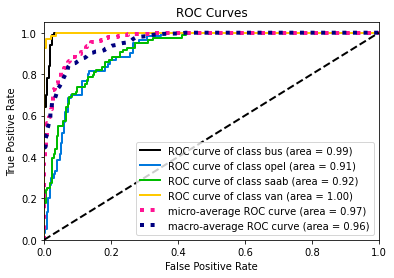

In [12]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, lr.predict_proba(X_test_scaled))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

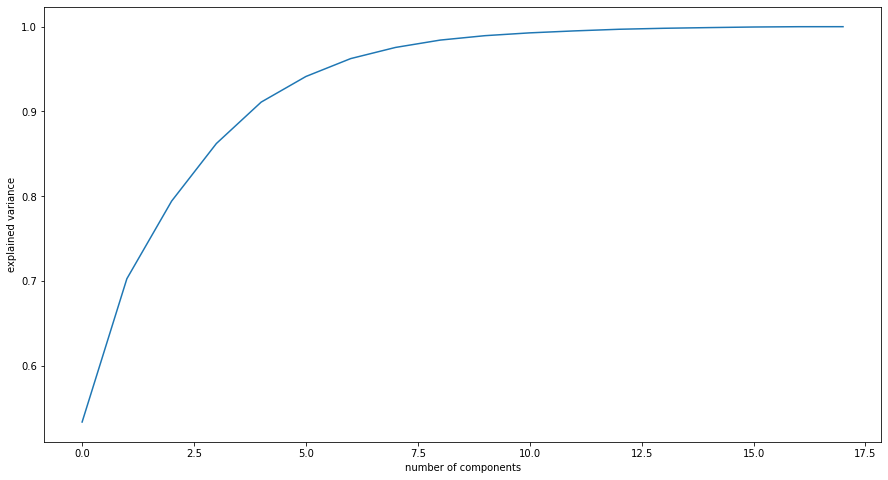

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)

plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

**I've chosen 10 components because varaince almost doesn't go up when more components taken.** 

**Yes, data should be normalized, because different features could be measured with different units (in different scales). And one might have a bigger variance just because of it.**

In [14]:
pca = PCA(n_components=10).fit(X_train_scaled)
X_train_compressed = pca.transform(X_train_scaled)
X_test_compressed = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [12]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
params = {
     'Cs': [0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
     'fit_intercept': [True, False]
}

grid = GridSearchCV(lr, params)
grid.fit(X_train_compressed, y_train)

GridSearchCV(estimator=LogisticRegressionCV(max_iter=1000,
                                            multi_class='multinomial',
                                            solver='saga', tol=0.001),
             param_grid={'Cs': [0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
                         'fit_intercept': [True, False]})

In [ ]:
grid.best_params_

{'Cs': 10, 'fit_intercept': True}

In [ ]:
lr = LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000, fit_intercept=True)
params = {
     'Cs': np.arange(5, 50, 1)
}

grid = GridSearchCV(lr, params)
grid.fit(X_train_compressed, y_train)

GridSearchCV(estimator=LogisticRegressionCV(max_iter=1000,
                                            multi_class='multinomial',
                                            solver='saga', tol=0.001),
             param_grid={'Cs': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
grid.best_params_

{'Cs': 8}

In [ ]:
lr = LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000, fit_intercept=True, Cs=8)
lr.fit(X_train_compressed, y_train)

predictions = lr.predict(X_test_compressed)
print("accuracy {}".format(accuracy_score(y_test, predictions)))
print("f1 {}".format(f1_score(y_test, predictions, average='weighted')))

accuracy 0.7239057239057239
f1 0.7136006926344315


**Scores are lower with n_components=10 comparing with lr using all features**

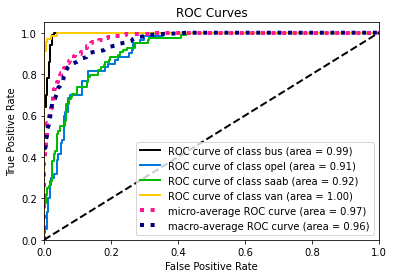

In [ ]:
skplt.metrics.plot_roc(y_test, lr.predict_proba(X_test_scaled))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [13]:
from sklearn.tree import DecisionTreeClassifier

params = {
     'max_depth': np.arange(1, 100, 1)
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
grid.fit(X_train_pd, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [14]:
grid.best_params_

{'max_depth': 8}

In [ ]:
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train_pd, y_train)

predictions = tree.predict(X_test_pd)
print("accuracy {}".format(accuracy_score(y_test, predictions)))
print("f1 {}".format(f1_score(y_test, predictions, average='weighted')))

accuracy 0.7205387205387206
f1 0.7162379450228487


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [34]:
from sklearn.ensemble import BaggingClassifier

accuracy_lr = []
f1_lr = []
accuracy_tree = []
f1_tree = []

for i in range(2, 100, 5):
    bagging_lr = BaggingClassifier(base_estimator=LogisticRegressionCV(multi_class='multinomial', solver='saga', 
                                                                       tol=1e-3, max_iter=500, fit_intercept=True, Cs=8), n_estimators=i)
    bagging_lr.fit(X_train_scaled, y_train)
    predictions = bagging_lr.predict(X_test_scaled)
    accuracy_lr.append(accuracy_score(y_test, predictions))
    f1_lr.append(f1_score(y_test, predictions, average='weighted'))
    
    bagging_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8), n_estimators=i)
    bagging_tree.fit(X_train_scaled, y_train)
    predictions = bagging_tree.predict(X_test_scaled)
    accuracy_tree.append(accuracy_score(y_test, predictions))
    f1_tree.append(f1_score(y_test, predictions, average='weighted'))

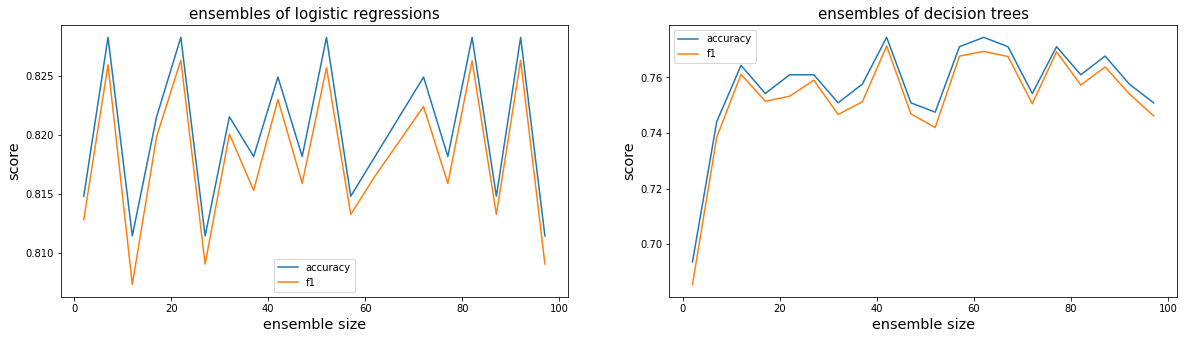

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(range(2, 100, 5), accuracy_lr, label='accuracy')
axes[0].plot(range(2, 100, 5), f1_lr, label='f1')
axes[0].set_title('ensembles of logistic regressions', fontsize=15)
axes[0].set_xlabel('ensemble size', fontsize='x-large')
axes[0].set_ylabel('score', fontsize='x-large')
axes[0].legend()

axes[1].plot(range(2, 100, 5), accuracy_tree, label='accuracy')
axes[1].plot(range(2, 100, 5), f1_tree, label='f1')
axes[1].set_title('ensembles of decision trees', fontsize=15)
axes[1].set_xlabel('ensemble size', fontsize='x-large')
axes[1].set_ylabel('score', fontsize='x-large')
axes[1].legend()

plt.show()

**There're several optimals numbers for bagging over lr (about 8, 20, etc.) and for decision trees (about 40, 60, etc).**

**The hyperparameters are different, see below**

In [24]:
from sklearn.ensemble import BaggingClassifier

best_depth = 1
best_acc = 0
for i in range(1, 100, 1):
  bagging_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=42)
  bagging_tree.fit(X_train_scaled, y_train)
  predictions = bagging_tree.predict(X_test_scaled)
  if accuracy_score(y_test, predictions) > best_acc:
    best_depth = i
    best_acc = accuracy_score(y_test, predictions)
  
print(best_depth)

89


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

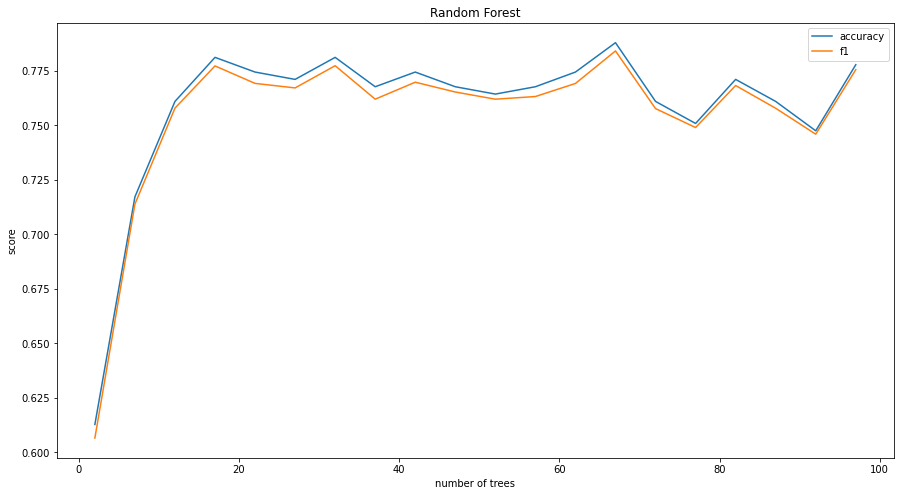

In [16]:
from sklearn.ensemble import RandomForestClassifier

accuracy = []
f1 = []

for i in range(2, 100, 5):
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(X_train_scaled, y_train)
  predictions = rf.predict(X_test_scaled)
  accuracy.append(accuracy_score(y_test, predictions))
  f1.append(f1_score(y_test, predictions, average='weighted'))

plt.figure(figsize=(15, 8))
plt.title('Random Forest')
plt.plot(range(2, 100, 5), accuracy, label='accuracy')
plt.plot(range(2, 100, 5), f1, label='f1')
plt.xlabel('number of trees')
plt.ylabel('score')
plt.legend()
plt.show()

**Optimal number of trees is 17. It's different from the previous result, because the algorithms differ as well. Random forest is not pure bagging, it also uses feature bagging (which is training on random samples of features and not on the whole set)**

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [17]:
accuracy_lr = []
f1_lr = []
accuracy_tree = []
f1_tree = []
accuracy_rf = []
f1_rf = []

size = len(X_train_scaled)
step = size//10
for start in range(0, size, step):
  cur_X_train = X_train_scaled[: min(start+step, size)]
  cur_Y_train = y_train[: min(start+step, size)]

  lr = LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, fit_intercept=True, Cs=8)
  tree = DecisionTreeClassifier(max_depth=8)
  rf = RandomForestClassifier(n_estimators=17)

  lr.fit(cur_X_train, cur_Y_train)
  tree.fit(cur_X_train, cur_Y_train)
  rf.fit(cur_X_train, cur_Y_train)

  predictions = lr.predict(X_test_scaled)
  accuracy_lr.append(accuracy_score(y_test, predictions))
  f1_lr.append(f1_score(y_test, predictions, average='weighted'))

  predictions = tree.predict(X_test_scaled)
  accuracy_tree.append(accuracy_score(y_test, predictions))
  f1_tree.append(f1_score(y_test, predictions, average='weighted'))

  predictions = rf.predict(X_test_scaled)
  accuracy_rf.append(accuracy_score(y_test, predictions))
  f1_rf.append(f1_score(y_test, predictions, average='weighted'))

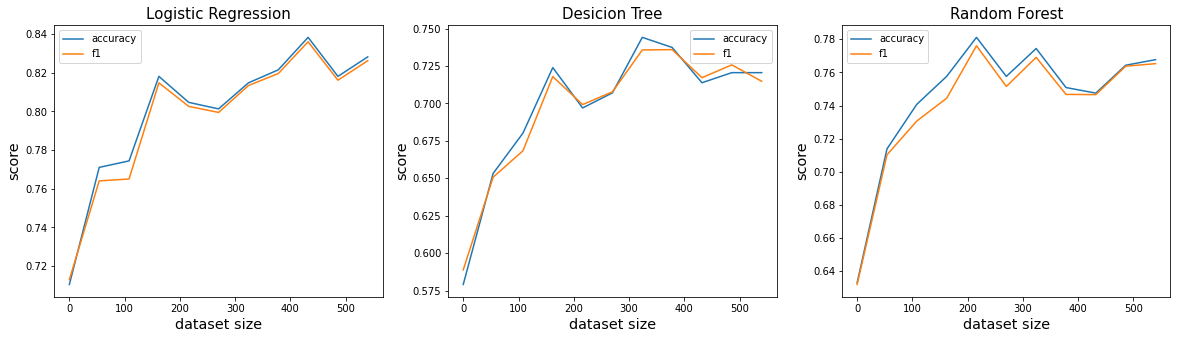

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(range(0, size, step), accuracy_lr, label='accuracy')
axes[0].plot(range(0, size, step), f1_lr, label='f1')
axes[0].set_title('Logistic Regression', fontsize=15)
axes[0].set_xlabel('dataset size', fontsize='x-large')
axes[0].set_ylabel('score', fontsize='x-large')
axes[0].legend()

axes[1].plot(range(0, size, step), accuracy_tree, label='accuracy')
axes[1].plot(range(0, size, step), f1_tree, label='f1')
axes[1].set_title('Desicion Tree', fontsize=15)
axes[1].set_xlabel('dataset size', fontsize='x-large')
axes[1].set_ylabel('score', fontsize='x-large')
axes[1].legend()

axes[2].plot(range(0, size, step), accuracy_rf, label='accuracy')
axes[2].plot(range(0, size, step), f1_rf, label='f1')
axes[2].set_title('Random Forest', fontsize=15)
axes[2].set_xlabel('dataset size', fontsize='x-large')
axes[2].set_ylabel('score', fontsize='x-large')
axes[2].legend()

plt.show()

**Small datasets are not enough for training accurate models, but with too big datasets we can also loose in accuracy.**